# **DSBA 6165: AI & Deep Learning**

Professor: Rick Chakra

TA: Spencer Tilley

# KNN Classifier

In [7]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

In [2]:
#update scikit-learn, restart, and rerun imports from first cell
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Creating KNN with Iris Data



Iris data set consists of 150 samples having three classes namely Iris-Setosa, Iris-Versicolor, and Iris-Virginica. Four features/attributes contribute to uniquely identifying as one of the three classes are sepal-length, sepal-width, petal-length and petal-width.


In [1]:
# import
from sklearn.datasets import load_iris

load_iris has both the data and the class labels for each sample. Let's quickly extract all of it.

In [2]:
# Load the dataset
data = load_iris().data

data variable will be a numpy array of shape (150,4) having 150 samples each having four different attributes. Each class has 50 samples each.

In [3]:
# Print the dataset dimensions
data.shape

(150, 4)

Let's extract the class labels.

In [4]:
# Extract the labels
labels = load_iris().target

In [5]:
# Print the dimensions
labels.shape

(150,)

Next, you have to combine the data and the class labels, and for that, you will use an excellent python library called NumPy. NumPy adds support for large, multi-dimensional arrays and matrices, along with an extensive collection of high-level mathematical functions to operate on these arrays. So, let's quickly import it!

Since data is a 2-d array, you will have to reshape the labels also to a 2-d array.

In [8]:
# Reshape the data
labels = np.reshape(labels,(150,1))

Now, you will use the concatenate function available in the numpy library, and you will use axis=-1 which will concatenate based on the second dimension.

In [9]:
# Concatenate using second dimension
data = np.concatenate([data,labels], axis=1)

In [10]:
# Print the dimensions
data.shape

(150, 5)

In [12]:
#Add list of column names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [13]:
# Create a dataframe
dataset = pd.DataFrame(data,columns=names)

In [14]:
#look at what data looks like/First Rows
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Now, you have the dataset data frame that has both data & the class labels that you need!

As you can see the label for species is not clear just by looking at it, so lets change the label for species from a number into actual names. You will use inplace=True which will modify the data frame dataset.

In the real world you'd need to look at documentation to learn what the number values meant

In [15]:
# Recode the labels
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

Let's print the first five rows of the dataset and see what it looks like!

In [16]:
# Print the first rows
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Analyze your Data

Let's quickly find out how all the three flowers look like when visualized and how different they are from each other not just in numbers but also in real!
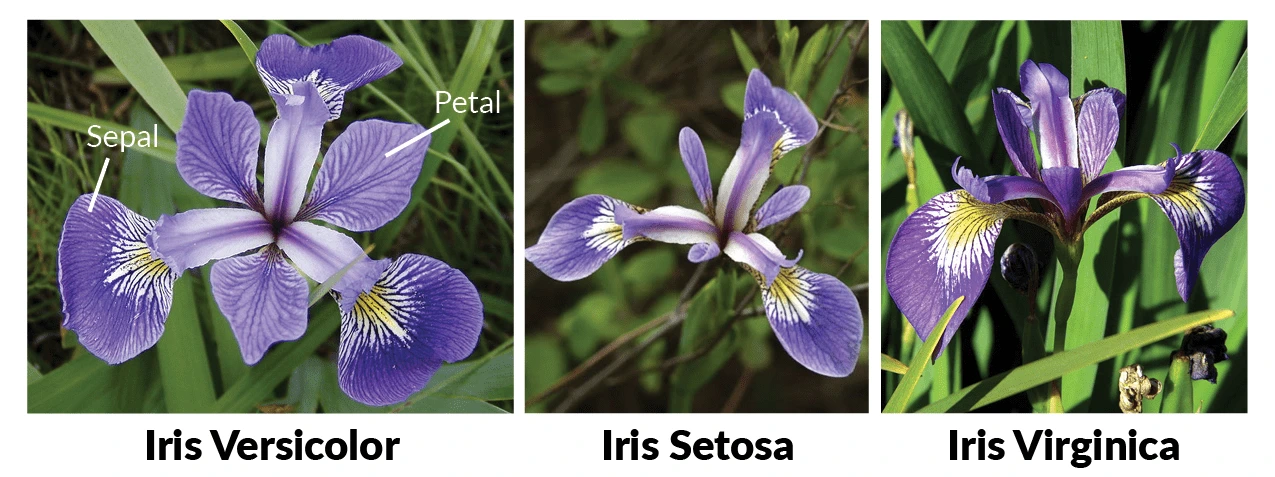

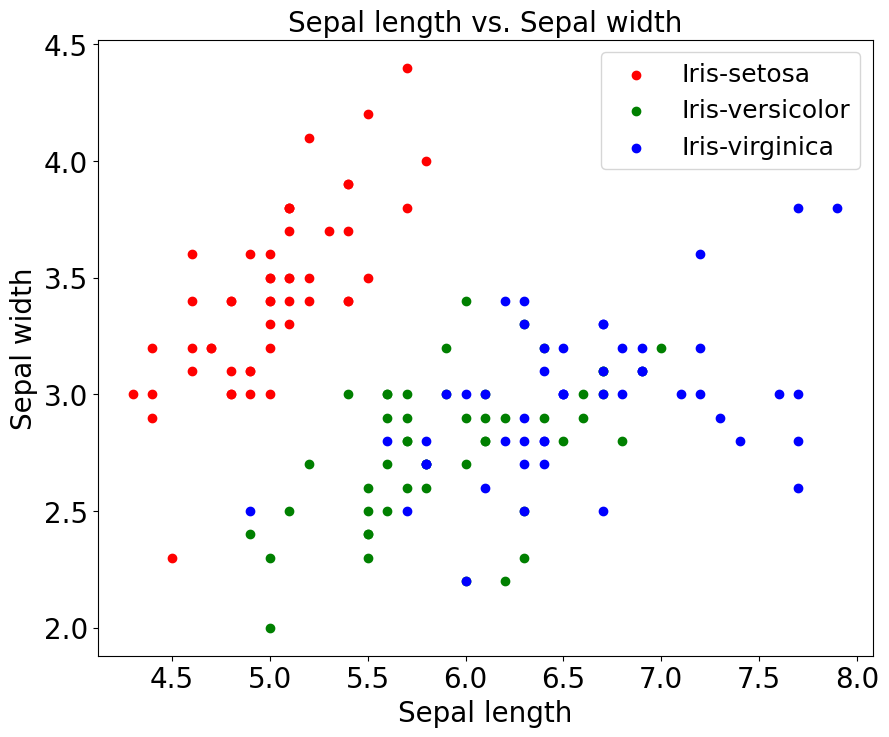

In [17]:
# plot the Sepal data
plt.figure(4, figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

From the above plot, it is very much apparent that there is a high correlation between the Iris setosa flowers w.r.t the sepal length and sepal width. On the other hand, there is less correlation between Iris versicolor and Iris virginica. The data points in versicolor & virginica are more spread out compared to setosa that are dense.

Let's just quickly also plot the graph for petal-length and petal-width.

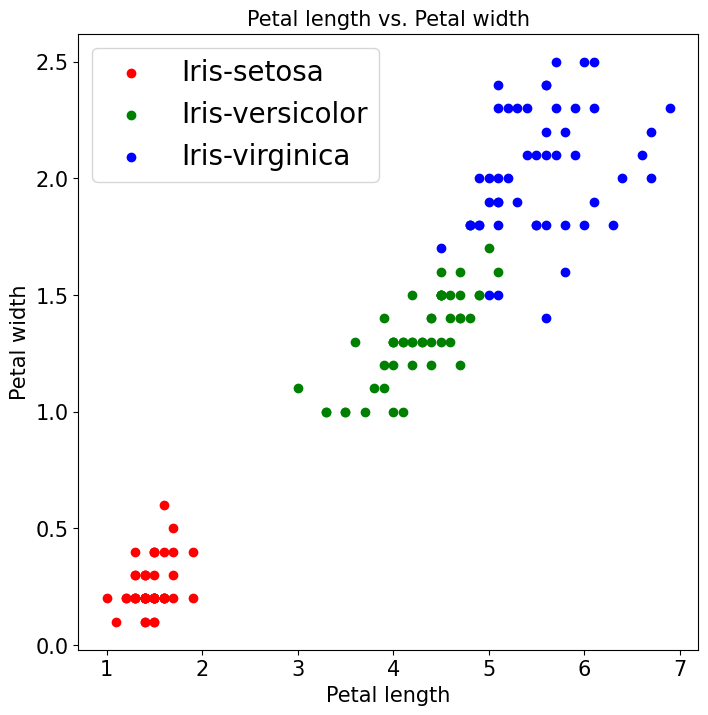

In [18]:
# plot the Petal data
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

Even when it comes to petal-length and petal-width, the above graph indicates a strong correlation for setosa flowers which are densely clustered together.

In [19]:
# Check correlation
dataset.iloc[:,:].corr()

<ipython-input-19-a2942224d778>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.iloc[:,:].corr()


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.117570,0.871754,0.817941
sepal-width,-0.117570,1.000000,-0.428440,-0.366126
petal-length,0.871754,-0.428440,1.000000,0.962865
petal-width,0.817941,-0.366126,0.962865,1.000000


The above table signifies a strong correlation of 0.96 for petal-length and petal-width when all three species are combined.

Let's also analyze the correlation between all three species separately.

In [20]:
# Check correlation
dataset.iloc[:50,:].corr() #setosa

<ipython-input-20-c311eee4be69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.iloc[:50,:].corr() #setosa


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [21]:
# Check correlation
dataset.iloc[50:100,:].corr() #versicolor

<ipython-input-21-1100f89aa569>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.iloc[50:100,:].corr() #versicolor


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [22]:
# Check correlation
dataset.iloc[100:,:].corr() #virginica

<ipython-input-22-6517819e645d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.iloc[100:,:].corr() #virginica


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


From the above three tables, it is pretty much clear that the correlation between petal-length and petal-width of setosa and virginica is 0.33 and 0.32 respectively. Whereas, for versicolor it is 0.78.

## Preprocessing your Data

After having loaded the data and analyzed it extensively, it is time to prepare your data which you can then feed to your ML model. In this section, you will preprocess your data in two ways: normalizing your data and splitting your data into training and testing sets.

Normalizing your data
There can be two ways by which you can normalize your data:

* *Example normalization* wherein you normalize each sample individually,
* *Feature normalization* in which you normalize each feature in the same way across all samples.

Now the question is why or when do you need to normalize your data? And do you need to standardize the Iris data?

Well, the answer is pretty much all the time. It is a good practice to normalize your data as it brings all the samples in the same scale and range. Normalizing the data is crucial when the data you have is not consistent. You can check for inconsistency by using the describe() function that you studied above which will give you max and min values. If the max and min values of one feature are significantly larger than the other feature then normalizing both the features to the same scale is very important.

Let's say X is one feature having a larger range and Y being the second feature with a smaller range. Then, the influence of feature Y can be overpowered by feature X's influence. In such a case, it becomes important to normalize both the features X and Y.

In Iris data, normalization is not required.

Let's print the *describe()* function and see why you do not need any normalization.

In [23]:
# Print dataset info
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The sepal-length attribute has values that go from 4.3 to 7.9 and sepal-width contains values from 2 to 4.4, while petal-length values range from 1 to 6.9 and petal-width ranges from 0.1 to 2.5. The values of all the features are within the range of 0.1 and 7.9, which you can consider acceptable. Hence, you do not need to apply any normalization to the Iris dataset.

## Splitting the data

Let's split the data just like we did last week


In [29]:
# Split the data
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,4], test_size=0.2, random_state=42)

Note that the *random_state* is a seed that takes a random_state as input if you change the number the split of the data will also change. However, if you keep the random_state same and run the cell multiple times the data splitting will remain unchanged.

Finally, it's time to feed the data to the k-nearest neighbor algorithm!

## The KNN Model
After all the loading, analyzing and preprocessing of the data, it is now time when you will feed the data into the KNN model. To do this, you will use sklearn's inbuilt function neighbors which has a class called KNeigborsClassifier in it.

**Note:** the k (n_neighbors) parameter is often an odd number to avoid ties in the voting scores.

In order to decide the best value for hyperparameter k, you will do something called grid-search. You will train and test your model on 10 different k values and finally use the one that gives you the best results.

Let's initialize a variable neighbors(k) which will have values ranging from 1-9 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy. You will need them later to plot a graph to choose the best neighbor value.

In [30]:
# Initialize k
neighbors = np.arange(1,9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

Next piece of code is where all the magic will happen. You will enumerate over all the nine neighbor values and for each neighbor you will then predict both on training and testing data. Finally, store the accuracy in the train_accuracy and test_accuracy numpy arrays.

In [31]:
for i,k in enumerate(neighbors):

    # Instantiate classifiers
    knn = KNeighborsClassifier(n_neighbors=k) #FILL IN

    #Fit the model
    knn.fit(train_data, train_label) #FILL IN

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

Next, you will plot the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph you will be able to choose the best k value at which your model performs the best.

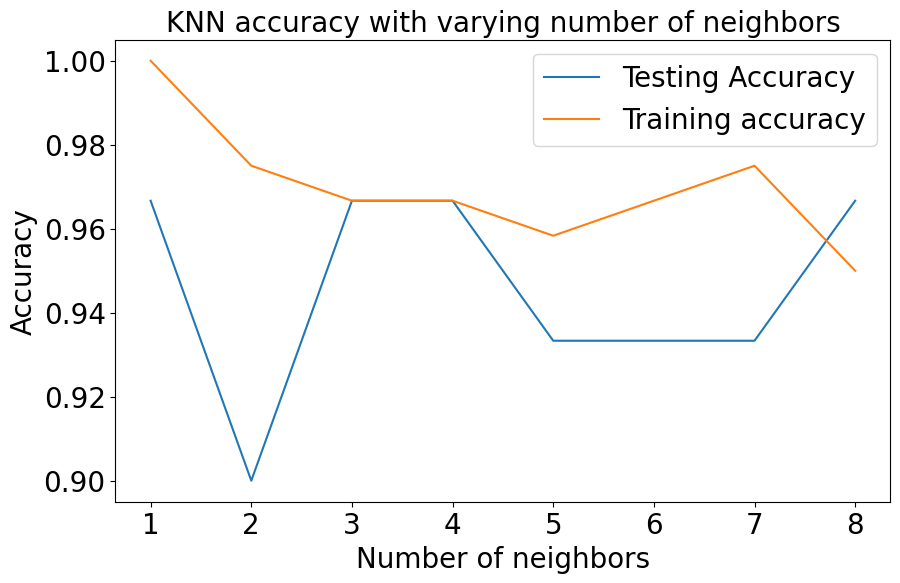

In [32]:
# Plot accuracy per k
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Well, by looking at the above graph, it looks like when n_neighbors=3, both the model performs the best. So, let's stick with n_neighbors=3 and re-run the training once again.

In [34]:
# Instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

print(train_accuracy)
print(test_accuracy)

0.9666666666666667
0.9666666666666667


Let´s plot the decision Boundary. We will only use two columns of the dataset for this visualization.

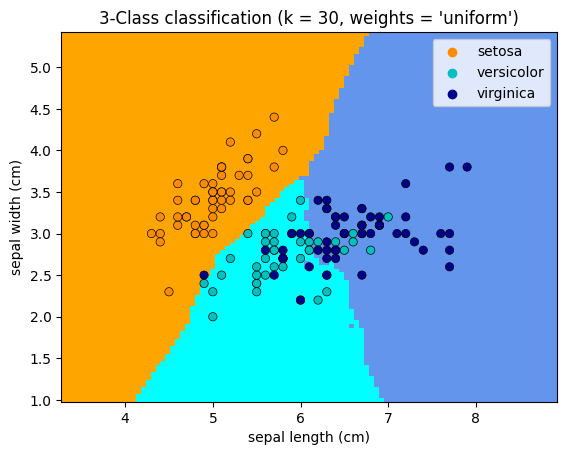

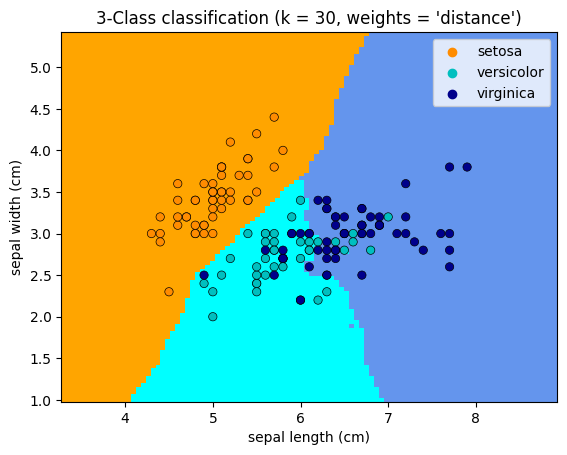

In [35]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 30

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

## Evaluating your Model
In the last segment of this tutorial, you will be evaluating your model on the testing data using a couple of techniques like confusion_matrix and classification_report.

Let's first check the accuracy of the model on the testing data.

In [36]:
# Print accuracy
test_accuracy

0.9666666666666667

Viola! It looks like the model was able to classify 96.66% of the testing data correctly. Isn't that amazing? With just a few lines of code, you were able to train an ML model that is now able to tell you the flower name by using only four features with 96.66% accuracy. Who knows maybe it performed way better than a human can.

## Confusion Matrix
A confusion matrix is mainly used to describe the performance of your model on the test data for which the true values or labels are known.

Scikit-learn provides a function that calculates the confusion matrix for you.

In [37]:
# Create predictions for test data
prediction = knn.predict(test_data)

The following plot_confusion_matrix() function has been modified and acquired from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

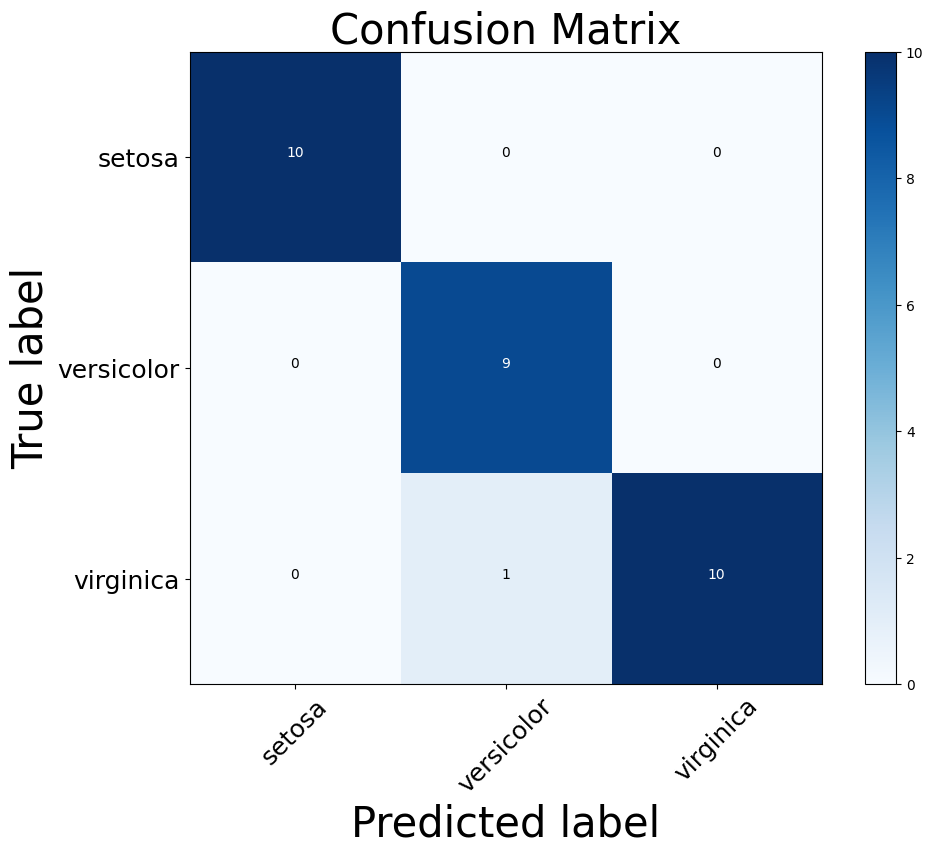

In [38]:
# Create confusion matrix plot
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()


From the above confusion_matrix plot, you can observe that the model classified all the flowers correctly except one versicolor flower which is classified as a virginica flower.

## Classification Report

Classification report helps you in identifying the misclassified classes in much more detail by giving precision, recall and F1 score for each class. You will use the sklearn library to visualize the classification report.

In [39]:
from sklearn.metrics import classification_report

# Print Classification Report
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**Pros**
The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

**Cons**
The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

**How to improve KNN?**

For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.